<a href="https://colab.research.google.com/github/hansudixit/hansudixit/blob/main/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.9 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252699 sha256=c5092e83c9b92

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from collections import Counter
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

READING FILES

In [ ]:
train_data=pd.read_csv("/content/SalaryData_Train.csv")
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
del train_data['education']

In [ ]:
del train_data['relationship']

In [ ]:
train_data

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
30157,40,Private,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,>50K
30158,58,Private,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K
30159,22,Private,9,Never-married,Adm-clerical,White,Male,0,0,20,United-States,<=50K


In [ ]:
test_data=pd.read_csv("/content/SalaryData_Test.csv.crdownload")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13601,44,Private,Some-college,10.0,Divorced,Transport-moving,Unmarried,White,Male,0.0,0.0,35.0,England,<=50K
13602,45,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
13603,24,Private,12th,8.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
13604,42,State-gov,Assoc-acdm,12.0,Divorced,Tech-support,Not-in-family,Black,Female,0.0,1974.0,40.0,United-States,<=50K


In [ ]:
del test_data['education']

In [ ]:
del test_data['relationship']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
test_data.isnull().sum()

age              0
workclass        0
educationno      1
maritalstatus    1
occupation       1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [ ]:
train_data['workclass']=encoder.fit_transform(train_data['workclass'])
train_data['maritalstatus']=encoder.fit_transform(train_data['maritalstatus'])
train_data['occupation']=encoder.fit_transform(train_data['occupation'])
train_data['race']=encoder.fit_transform(train_data['race'])
train_data['sex']=encoder.fit_transform(train_data['sex'])
train_data['native']=encoder.fit_transform(train_data['native'])
train_data

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,13,4,0,4,1,2174,0,40,37,<=50K
1,50,4,13,2,3,4,1,0,0,13,37,<=50K
2,38,2,9,0,5,4,1,0,0,40,37,<=50K
3,53,2,7,2,5,2,1,0,0,40,37,<=50K
4,28,2,13,2,9,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,4,0,0,0,38,37,<=50K
30157,40,2,9,2,6,4,1,0,0,40,37,>50K
30158,58,2,9,6,0,4,0,0,0,40,37,<=50K
30159,22,2,9,4,0,4,1,0,0,20,37,<=50K


In [ ]:
test_data['workclass']=encoder.fit_transform(test_data['workclass'])
test_data['maritalstatus']=encoder.fit_transform(test_data['maritalstatus'])
test_data['occupation']=encoder.fit_transform(test_data['occupation'])
test_data['race']=encoder.fit_transform(test_data['race'])
test_data['sex']=encoder.fit_transform(test_data['sex'])
test_data['native']=encoder.fit_transform(test_data['native'])
test_data

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,7.0,4,6,2,1,0.0,0.0,40.0,37,<=50K
1,38,2,9.0,2,4,4,1,0.0,0.0,50.0,37,<=50K
2,28,1,12.0,2,10,4,1,0.0,0.0,40.0,37,>50K
3,44,2,10.0,2,6,2,1,7688.0,0.0,40.0,37,>50K
4,34,2,6.0,4,7,4,1,0.0,0.0,30.0,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
13601,44,2,10.0,0,13,4,1,0.0,0.0,35.0,8,<=50K
13602,45,2,9.0,2,2,4,1,0.0,0.0,40.0,37,>50K
13603,24,2,8.0,2,0,4,1,0.0,0.0,50.0,37,<=50K
13604,42,5,12.0,0,12,2,0,0.0,1974.0,40.0,37,<=50K


In [ ]:
train_data.shape

(30161, 12)

In [ ]:
test_data.shape

(13606, 12)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  int64 
 2   educationno    30161 non-null  int64 
 3   maritalstatus  30161 non-null  int64 
 4   occupation     30161 non-null  int64 
 5   race           30161 non-null  int64 
 6   sex            30161 non-null  int64 
 7   capitalgain    30161 non-null  int64 
 8   capitalloss    30161 non-null  int64 
 9   hoursperweek   30161 non-null  int64 
 10  native         30161 non-null  int64 
 11  Salary         30161 non-null  object
dtypes: int64(11), object(1)
memory usage: 2.8+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13606 entries, 0 to 13605
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            13606 non-null  int64  
 1   workclass      13606 non-null  int64  
 2   educationno    13605 non-null  float64
 3   maritalstatus  13606 non-null  int64  
 4   occupation     13606 non-null  int64  
 5   race           13606 non-null  int64  
 6   sex            13606 non-null  int64  
 7   capitalgain    13605 non-null  float64
 8   capitalloss    13605 non-null  float64
 9   hoursperweek   13605 non-null  float64
 10  native         13606 non-null  int64  
 11  Salary         13605 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 1.2+ MB


In [ ]:
train_data.describe()

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
count,30161.000000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.121316,2.580087,5.959849,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481
std,13.134830,0.95394,2.550037,1.498018,4.029633,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430
min,17.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.00000,9.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.00000,10.000000,2.000000,6.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,47.000000,2.00000,13.000000,4.000000,9.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.00000,16.000000,6.000000,13.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000


In [ ]:
test_data.describe()

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
count,13606.000000,13606.000000,13605.000000,13606.000000,13606.000000,13606.000000,13606.000000,13605.000000,13605.000000,13605.000000,13606.000000
mean,38.775173,2.218654,10.115252,2.596134,5.974570,3.686241,0.674923,1138.627269,90.267108,40.949504,35.468249
std,13.376814,0.968922,2.563846,1.505295,4.018308,0.824718,0.468578,7833.758778,409.159704,12.070971,5.876981
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,9.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000
50%,37.000000,2.000000,10.000000,2.000000,6.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000
75%,48.000000,2.000000,13.000000,4.000000,9.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000
max,90.000000,6.000000,16.000000,7.000000,14.000000,5.000000,2.000000,99999.000000,3770.000000,99.000000,40.000000


In [ ]:
train_data.isnull().sum()

age              0
workclass        0
educationno      0
maritalstatus    0
occupation       0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
test_data.isnull().sum()

age              0
workclass        0
educationno      1
maritalstatus    0
occupation       0
race             0
sex              0
capitalgain      1
capitalloss      1
hoursperweek     1
native           0
Salary           1
dtype: int64

<ipython-input-21-90059c436f60>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')
<ipython-input-21-90059c436f60>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')
<ipython-input-21-90059c436f60>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
 

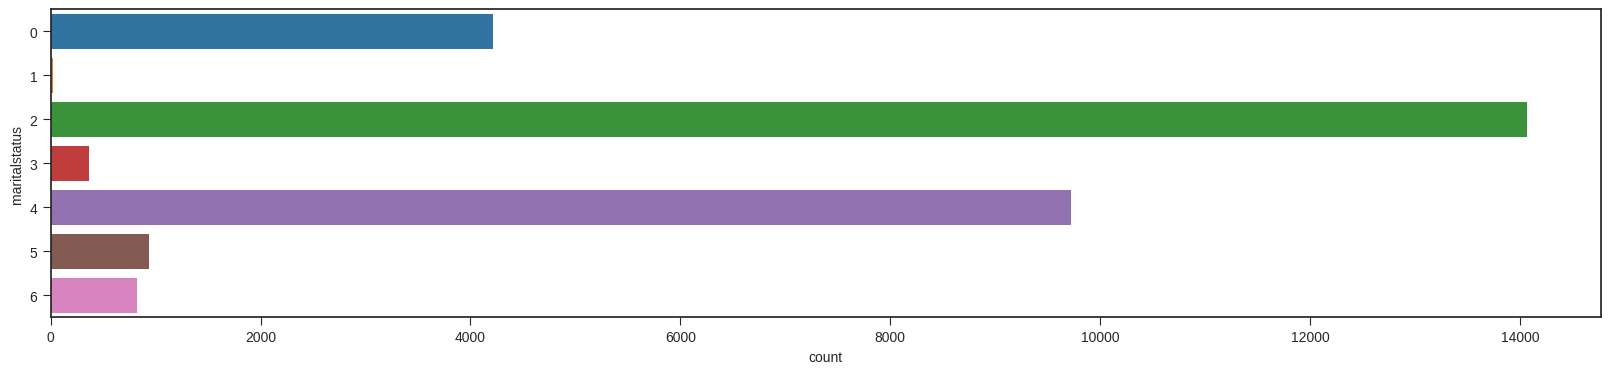

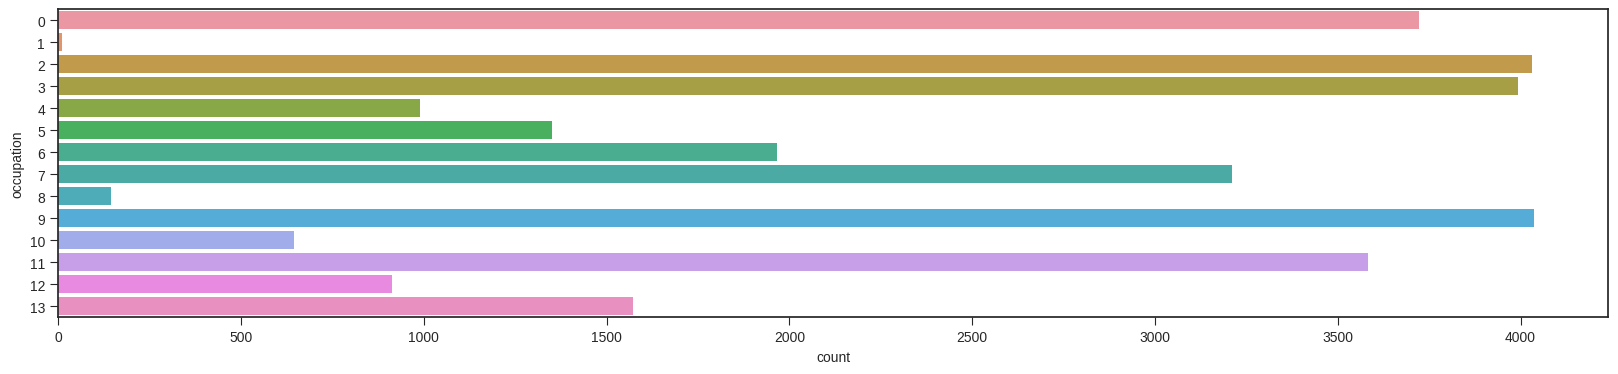

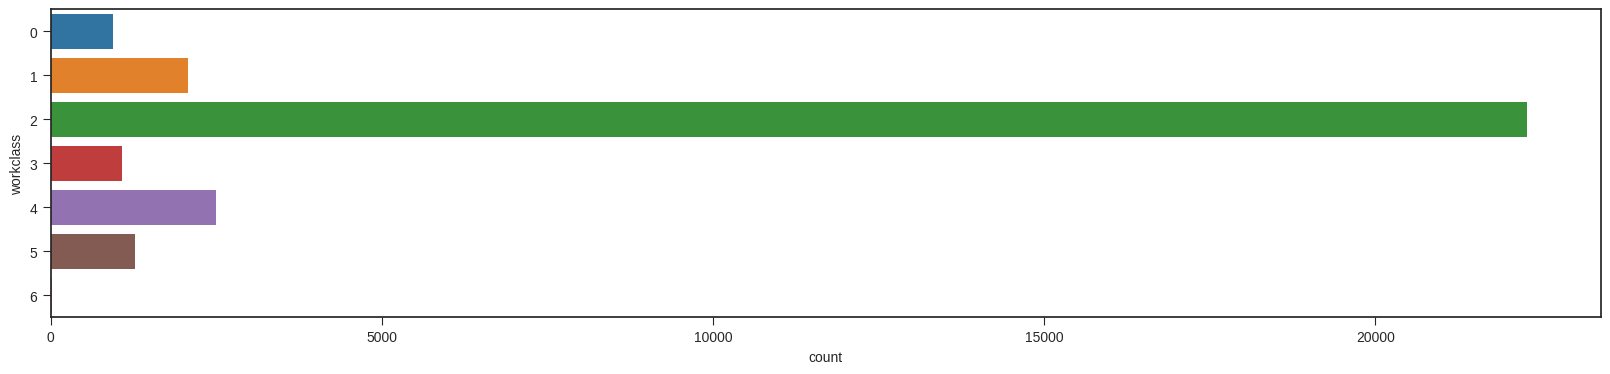

In [ ]:
plt.figure(figsize=(20,4))
plt.style.use('seaborn-ticks')
sns.countplot(y="maritalstatus", data=train_data);

plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4))
sns.countplot(y="occupation", data=train_data);

plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4))
sns.countplot(y="workclass", data=train_data);


In [ ]:
train_data.corr()

<ipython-input-22-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.080537,0.043525,-0.276363,-0.005682,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548
workclass,0.080537,1.000000,0.037833,-0.034235,0.015572,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598
educationno,0.043525,0.037833,1.000000,-0.063419,0.087717,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625
maritalstatus,-0.276363,-0.034235,-0.063419,1.000000,0.022655,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057
occupation,-0.005682,0.015572,0.087717,0.022655,1.000000,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298
race,0.023380,0.044734,0.032805,-0.068641,0.000717,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507
sex,0.081972,0.074966,0.006155,-0.119774,0.062316,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063
capitalgain,0.080152,0.035349,0.124416,-0.042414,0.022162,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513
capitalloss,0.060278,0.007244,0.079691,-0.035385,0.014612,0.023461,0.047285,-0.032218,1.000000,0.052454,0.010193
hoursperweek,0.101598,0.050723,0.152522,-0.189004,0.018365,0.048533,0.231272,0.080431,0.052454,1.000000,0.008429


HEAT MAP

<ipython-input-23-7ddeda4a326f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True);


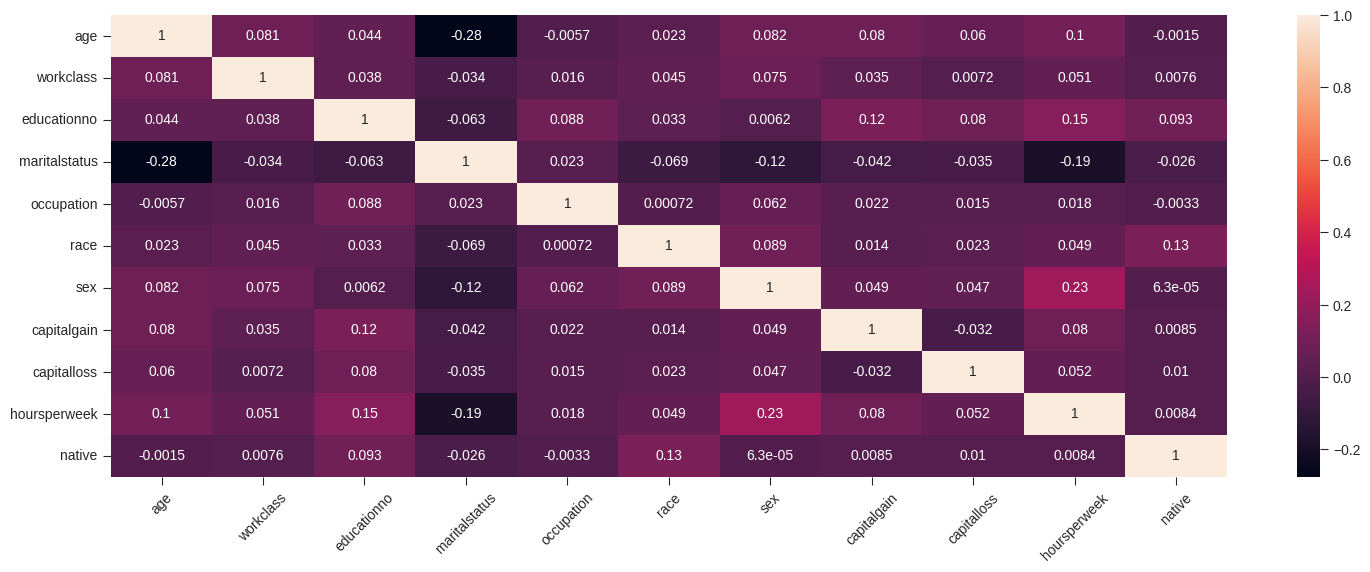

In [ ]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(train_data.corr(), annot=True);
plt.xticks(rotation=45);

In [ ]:
# List of Numerical Variables
numerical_features=[feature for feature in train_data.columns if train_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
train_data[numerical_features].head()

Number of numerical variables: 11


,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,13,4,0,4,1,2174,0,40,37
1,50,4,13,2,3,4,1,0,0,13,37
2,38,2,9,0,5,4,1,0,0,40,37
3,53,2,7,2,5,2,1,0,0,40,37
4,28,2,13,2,9,2,0,0,0,40,4


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(train_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 6


UNIVARIATE PLOTS

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 5


<ipython-input-27-89a7ede224c8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


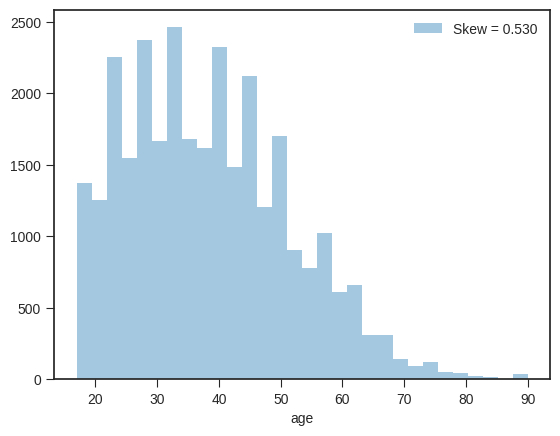

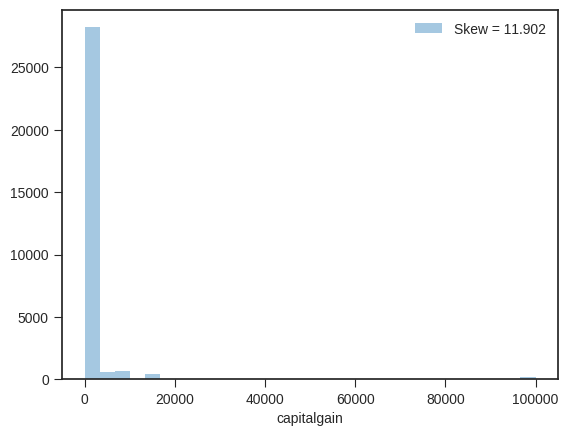

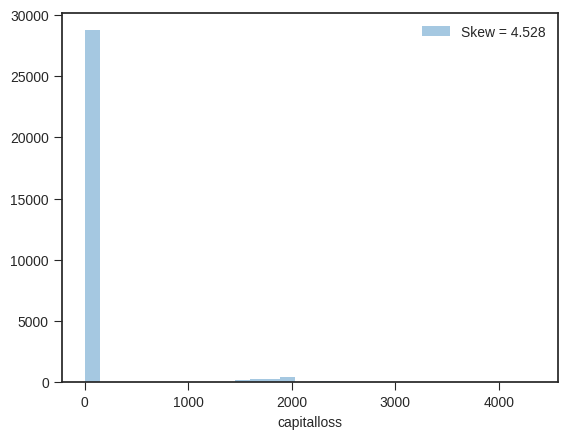

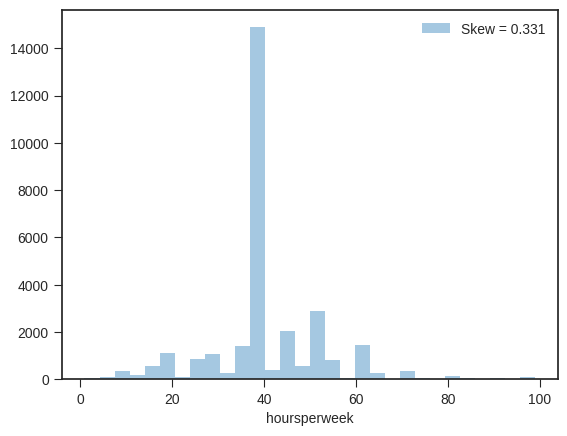

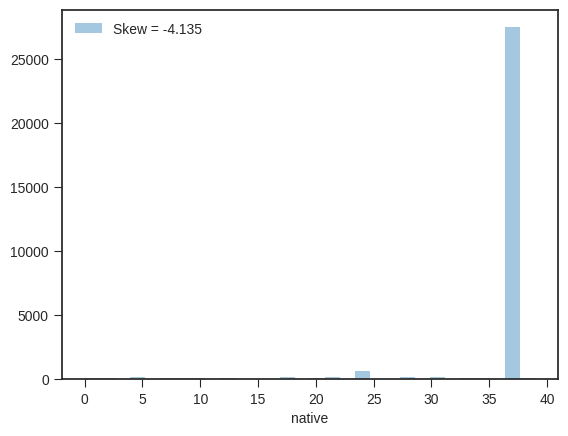

In [ ]:
for feat in continuous_feature:
    skew = train_data[feat].skew()
    sns.distplot(train_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show();

In [ ]:
continuous_feature

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'native']

MODEL BUILDING

In [ ]:
X_train=train_data.iloc[:,:-1]
Y_train=train_data.iloc[:,-1]

In [ ]:
X_test=test_data.iloc[:,:-1]
Y_test=test_data.iloc[:,-1]

In [ ]:
X_train

,age,workclass,educationno,maritalstatus,occupation,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,13,4,0,4,1,2174,0,40,37
1,50,4,13,2,3,4,1,0,0,13,37
2,38,2,9,0,5,4,1,0,0,40,37
3,53,2,7,2,5,2,1,0,0,40,37
4,28,2,13,2,9,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,4,0,0,0,38,37
30157,40,2,9,2,6,4,1,0,0,40,37
30158,58,2,9,6,0,4,0,0,0,40,37
30159,22,2,9,4,0,4,1,0,0,20,37


In [ ]:

Y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [ ]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# Create an imputer to fill in missing values with the mean (you can choose a different strategy)
imputer = SimpleImputer(strategy="mean")

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Create a pipeline to impute missing values and then classify
pipeline = Pipeline([
    ("imputer", imputer),
    ("classifier", clf)
])

# Fit the pipeline to your training data
pipeline.fit(X_train, Y_train)

# Now, preprocess your test data by transforming it using the same pipeline
X_test_imputed = pipeline.named_steps["imputer"].transform(X_test)

# Now, you can make predictions on the imputed test data
Y_test_pred = pipeline.named_steps["classifier"].predict(X_test_imputed)






In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(Y_test,Y_test_pred)

TypeError: ignored

In [ ]:
print(Y_test.dtype)
print(Y_test_pred.dtype)

object
<U6


In [ ]:
Y_train.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [ ]:
Y_test.value_counts()

 <=50K    10242
 >50K      3363
Name: Salary, dtype: int64